<a href="https://colab.research.google.com/github/KrizHa/ML_task/blob/main/Copy_of_HW_2_1_%D0%9F%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B0_%D0%BB%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97_%D0%B7%D0%B0_%D0%BE%D0%B4%D0%BD%D0%BE%D1%8E_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D1%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
medical_df = pd.read_csv('/content/drive/MyDrive/ML Course/data/medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error

Intercept: -2091.4205565650805
Slope: 267.2489128311998
Root Mean Squared Error MNK: 4662.51


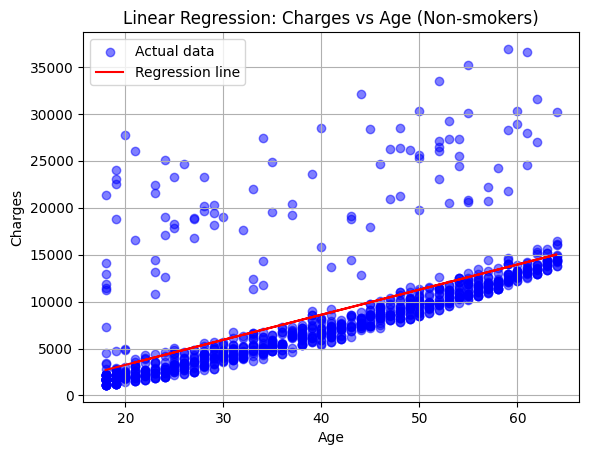

In [4]:
# Витягуємо значення age та charges
ages = non_smoker_df["age"].values
charges = non_smoker_df["charges"].values

# Додаємо стовпець одиниць до X для врахування bias
X = np.c_[np.ones((ages.shape[0], 1)), ages]  # Матриця з одиницями і значеннями age
y = charges

# Розрахунок коефіцієнтів методом найменших квадратів
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# Вільний член (intercept) і коефіцієнт перед age (slope)
intercept, slope = theta

print(f"Intercept: {intercept}")
print(f"Slope: {slope}")

# Побудова прогнозу
y_pred_MNK = np.dot(X, theta)

#Розрахунок Root Mean Squared Error
rmse_MNK = root_mean_squared_error(y, y_pred_MNK)
print(f"Root Mean Squared Error MNK: {rmse_MNK:.2f}")


plt.scatter(ages, charges, color='blue', label='Actual data', alpha=0.5)
plt.plot(ages, y_pred_MNK, color='red', label='Regression line')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.title('Linear Regression: Charges vs Age (Non-smokers)')
plt.grid(True)
plt.show()

При learning rate = 0.000001: Slope = 213.4575690658104, Intercept = 4.33124916239435
При learning rate = 0.000001: Root Mean Squared Error = 4723.65

При learning rate = 0.000010: Slope = 220.15455551129122, Intercept = 0.21300652799863293
При learning rate = 0.000010: Root Mean Squared Error = 4715.35

При learning rate = 0.000100: Slope = 221.1045843794301, Intercept = -41.98126853149978
При learning rate = 0.000100: Root Mean Squared Error = 4713.25



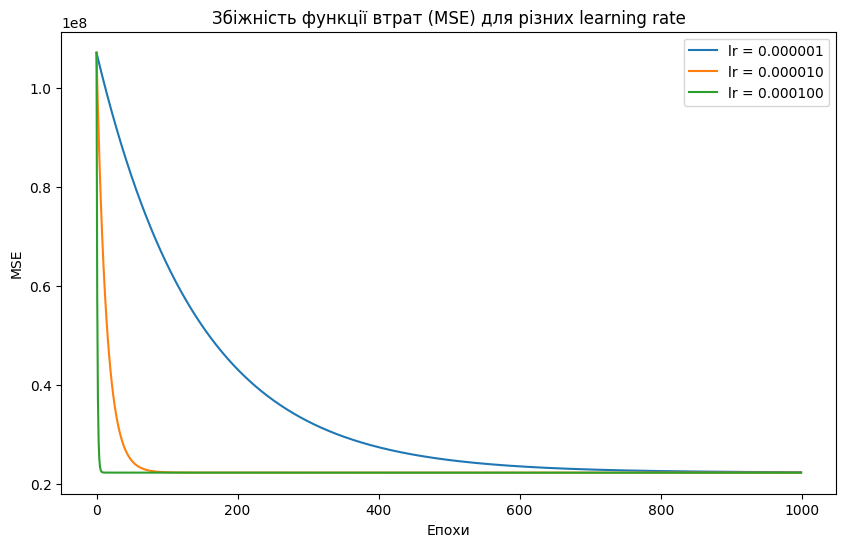

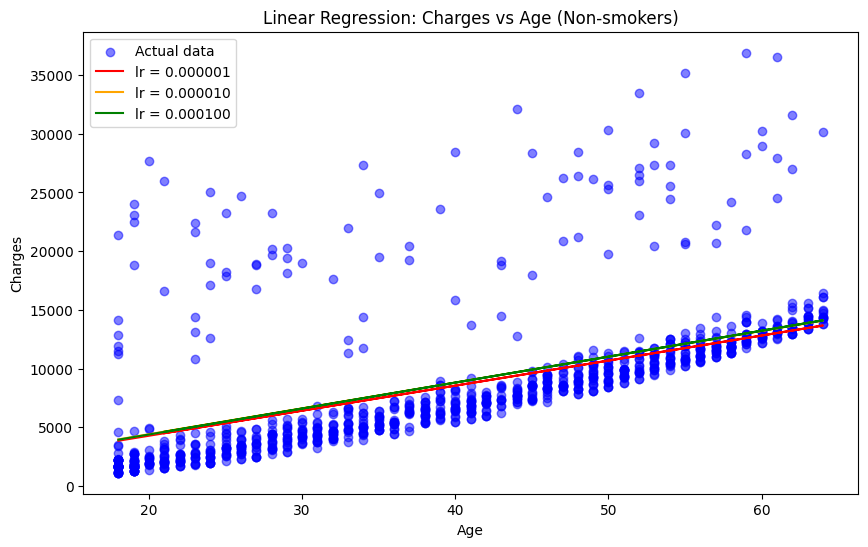

In [5]:
# Ініціалізація даних для градієнтного спуску
X = non_smoker_df["age"].values.reshape(-1, 1)  # Незалежна змінна (age)

# Реалізація Full-Batch градієнтного спуску
def full_batch_gradient_descent(X, y, lr=0.00001, epochs=1000):
    n = len(y)
    m, b = 0.0, 0.0  # Початкові параметри
    errors = []

    for _ in range(epochs):
        # Передбачення
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        errors.append(np.mean(error**2))  # MSE

        # Обчислення градієнтів
        m_gradient = (2 / n) * np.dot(error, X[:, 0])
        b_gradient = (2 / n) * np.sum(error)

        # Оновлення параметрів
        m = m - lr * m_gradient
        b = b - lr * b_gradient

    return m, b, errors

# Список learning rate для тестування
learning_rates = [0.000001, 0.00001, 0.0001]
epochs = 1000

# Зберігаємо результати для кожного learning rate у словнику
results = {}

for lr in learning_rates:
    m, b, errors = full_batch_gradient_descent(X, y, lr=lr, epochs=epochs)
    predictions_fbgd = m * X[:, 0] + b
    results[lr] = {"m": m, "b": b, "errors": errors, "predictions": predictions_fbgd}
    rmse_full_batch = root_mean_squared_error(y, predictions_fbgd)
    print(f"При learning rate = {lr:.6f}: Slope = {m}, Intercept = {b}")
    print(f"При learning rate = {lr:.6f}: Root Mean Squared Error = {rmse_full_batch:.2f}\n")


# Побудова графіка збіжності функції втрат (MSE) для всіх learning rate
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(results[lr]["errors"], label=f"lr = {lr:.6f}")
plt.title("Збіжність функції втрат (MSE) для різних learning rate")
plt.xlabel("Епохи")
plt.ylabel("MSE")
plt.legend()
plt.show()

# Побудова графіка лінії регресії для кожного learning rate
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Actual data", color="blue", alpha=0.5)
colors = ['red', 'orange', 'green']
for idx, lr in enumerate(learning_rates):
    plt.plot(X, results[lr]["predictions"], label=f"lr = {lr:.6f}", color=colors[idx])

plt.title("Linear Regression: Charges vs Age (Non-smokers)")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend()
plt.show()

Learning rate 0.000001 занадто малий, що означає повільне навчання і значення RMSE для нього найбільще. Червона лінія на графіку відризняється для двох інших learning rate.

Передбачення для learning rate 0.00001 та 0.0001 майже однакові, лініі на графіку співпадають. Різниця в помилках RMSE мінімальна. Однак по графіку збіжності помилки для 0.00001 зменшується більш плавно ніж для 0.0001 тож найкращий варіант для побудовини лінійної регресіі буде при learning rate 0.00001



In [6]:
!pip install scikit-learn --quiet

In [11]:
from sklearn.linear_model import LinearRegression

# Модель лінійної регресії Scikit-learn
lin_reg = LinearRegression()
ages = non_smoker_df["age"]
X  = ages.to_frame()
lin_reg.fit(X, y)
predictions_sklearn = lin_reg.predict(X)


print(f"Intercept: {lin_reg.intercept_}")
print(f"Slope: {lin_reg.coef_[0]}")

#Розрахунок Root Mean Squared Error
rmse_sklearn = root_mean_squared_error(y, predictions_sklearn)
print(f"Root Mean Squared Error Scikit-learn: {rmse_sklearn:.2f}")


Intercept: -2091.4205565650864
Slope: 267.2489128311997
Root Mean Squared Error Scikit-learn: 4662.51


Root Mean Squared Error MNK: 4662.51
Root Mean Squared Error Full-Batch Gradient Descent: 4715.35
Root Mean Squared Error Sklearn: 4662.51


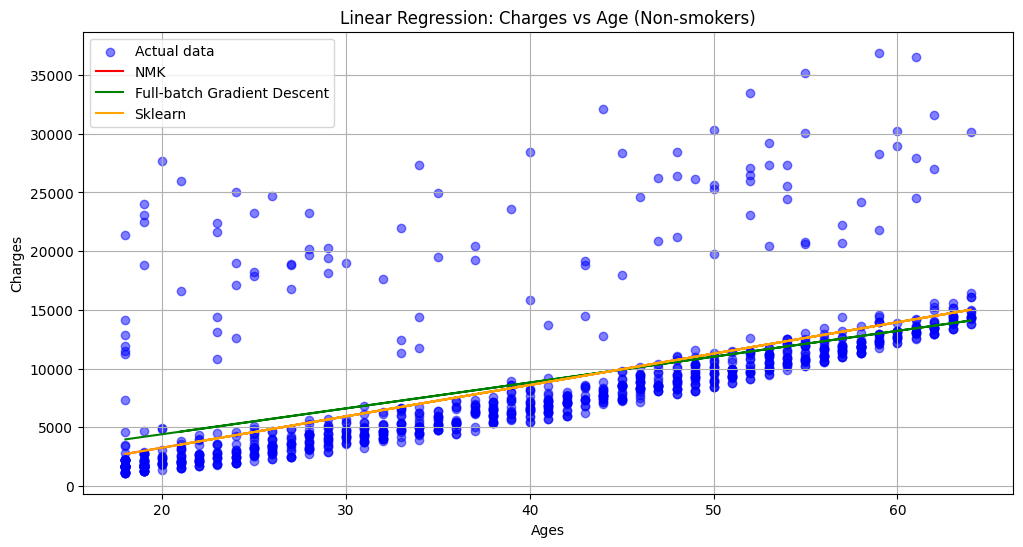

In [8]:
# Отримуємо передбачення для learning rate = 0.00001
selected_lr = 0.00001
predictions_fbgd = results[selected_lr]["predictions"]
rmse_full_batch = root_mean_squared_error(y, predictions_fbgd)

print(f"Root Mean Squared Error MNK: {rmse_MNK:.2f}")
print(f"Root Mean Squared Error Full-Batch Gradient Descent: {rmse_full_batch:.2f}")
print(f"Root Mean Squared Error Sklearn: {rmse_sklearn:.2f}")

# Візуалізація результатів
plt.figure(figsize=(12, 6))
plt.scatter(ages, charges, color='blue', label='Actual data', alpha=0.5)
plt.plot(ages, y_pred_MNK, color='red', label='NMK')
plt.plot(ages, predictions_fbgd, color='green', label='Full-batch Gradient Descent')
plt.plot(ages, predictions_sklearn, color='orange', label='Sklearn')
plt.title('Linear Regression: Charges vs Age (Non-smokers)')
plt.xlabel('Ages')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()

Графіки для Методу найменших квадратів та методом Sklearn співпадають, так само як і значення точності прогнозу. Метод градієнтного спуску має трішки гірше результати і лінія на графіку відризняється.

Мої виведені значення вручну були RMSE for slope=280 and intercept=-4000  RMSE
 4873.301227056433
 нахил був близький а от intercept відризняється так як намагалась розмістити лінію більш посередині до основго скупчення точок на графіку

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [9]:
smoker_df = medical_df[medical_df.smoker == 'yes']

In [10]:
smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


Intercept: 20294.128126915966
Slope: 305.2376021098288
Root Mean Squared Error Sklearn Smokers: 10711.00


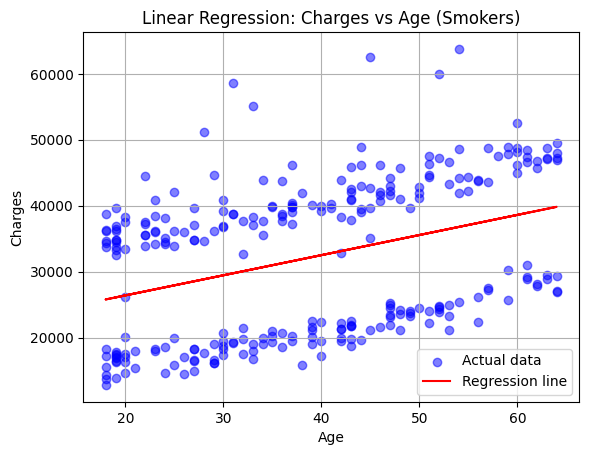

In [15]:
# Модель лінійної регресії Scikit-learn
ages_smoker = smoker_df["age"]
charges_smoker = smoker_df["charges"].values
X_s  = ages_smoker.to_frame()
y_s = charges_smoker

lin_reg_smoker = LinearRegression()
lin_reg_smoker.fit(X_s, y_s)

#Обчислення прогнозів
predictions_sklearn_smoker = lin_reg_smoker.predict(X_s)

rmse_sklearn_smoker = root_mean_squared_error(y_s, predictions_sklearn_smoker)

print(f"Intercept: {lin_reg_smoker.intercept_}")
print(f"Slope: {lin_reg_smoker.coef_[0]}")
print(f"Root Mean Squared Error Sklearn Smokers: {rmse_sklearn_smoker:.2f}")

plt.scatter(ages_smoker, charges_smoker, color='blue', label='Actual data', alpha=0.5)
plt.plot(ages_smoker, predictions_sklearn_smoker, color='red', label='Regression line')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.title('Linear Regression: Charges vs Age (Smokers)')
plt.grid(True)
plt.show()

In [14]:
smoker_df["charges"].describe()

,charges
count,274.000000
mean,32050.231832
std,11541.547176
min,12829.455100
25%,20826.244213
50%,34456.348450
75%,41019.207275
max,63770.428010


Як видно на графіку charges для курців умовно розбиті на дві групи і регресіна лінія розміщена між ними, через це не співпадає ні з однією із цих груп. Також значення RMSE 10711.00 дуже близьке до значення стандартного відхилення 11541.54, що свідчить про високий cost прогнозів. Таку б модель точно не використовувала :)

